# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-monty-hall-problem-lab/master/images/Image_58_MontyHall.png" alt="doors 1, 2, and 3 with two goats and a car">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [154]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(42)

In [65]:
car, select = rng.integers(low=1, high=3, size=2, endpoint= True)

In [169]:
trials = 0
switch_wins = 0
stick_wins = 0
switch_probs = []
stick_probs = []
doors = set([1, 2, 3])
for loop in range(1000):
    trials += 1
    car, select = rng.integers(low=1, high=3, size=2, endpoint=True)
    not_select = np.array(list(doors - set([select, car])))
    goat = rng.choice(not_select, 1)
    switch = list(doors - set([select, int(goat)]))[0]
    stick = select
    if switch == car:
        switch_wins += 1
    elif stick == car:
        stick_wins += 1
    else:
        print('ERROR')
    switch_probs.append(switch_wins / trials)
    stick_probs.append(stick_wins / trials)


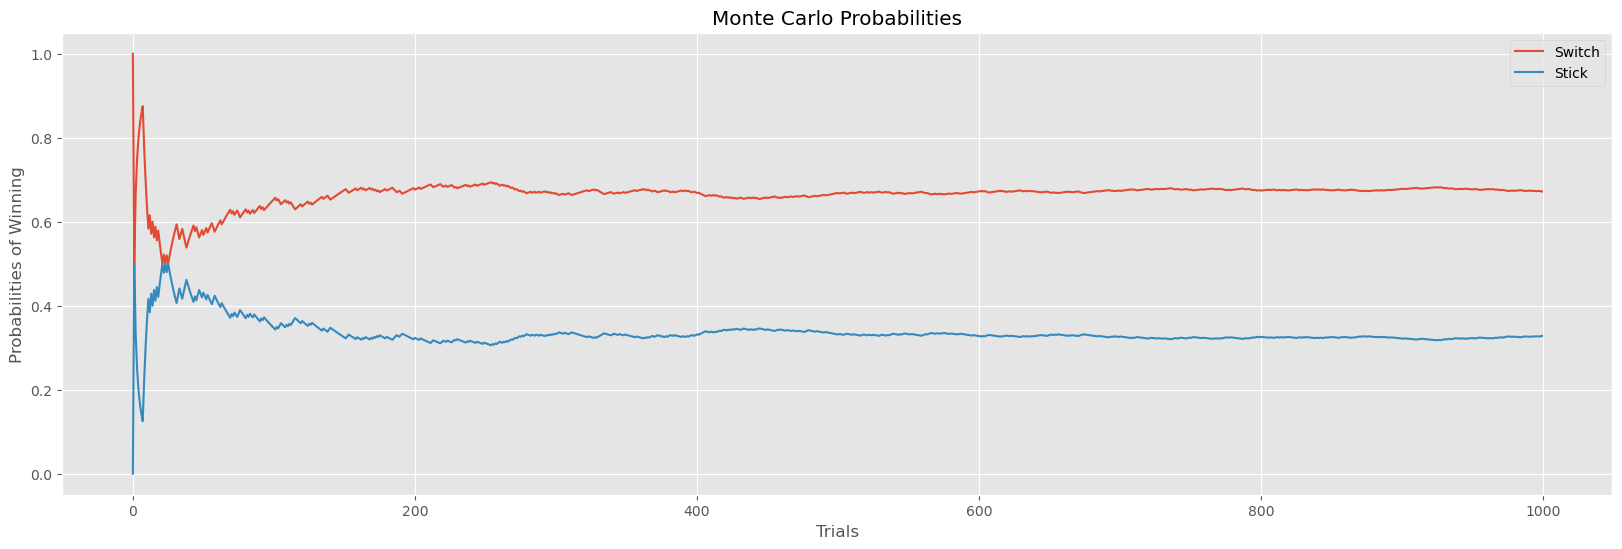

In [170]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(switch_probs, label = 'Switch')
ax.plot(stick_probs, label = 'Stick')
ax.set(title = 'Monte Carlo Probabilities',
      ylabel = 'Probabilities of Winning',
      xlabel = 'Trials')
ax.legend(loc='best');

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 